In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 연속형 변수 다 선택

Mean Squared Error: 1.697545363175001


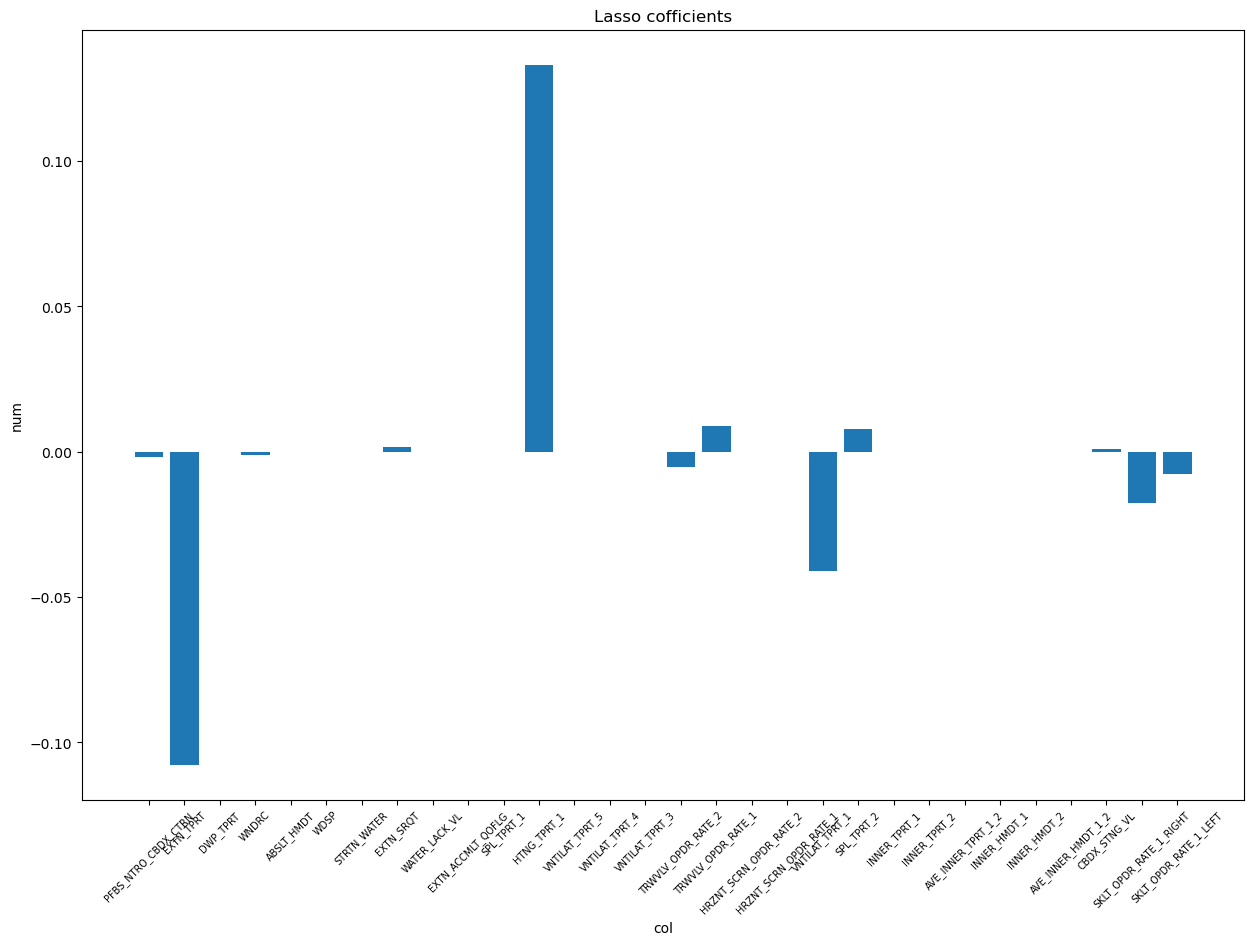

In [13]:
#랏쏘로 피처 선택
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

df = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")
# Feature와 Target 데이터 분리
X = df[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"]]  # 세 번째 열부터 끝까지가 설명 변수
y = df[['FRST_TREE_CNT']]

# Train과 Test 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso 회귀 모델 생성 및 피팅
lasso_model = Lasso(alpha=1.0)  # alpha 값은 L1 정규화 강도를 조절
lasso_model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = lasso_model.predict(X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#plt.figure(figsize=(20, 15))
#plt.plot(np.arange(len(y_test)), y_test, label='real value')
#plt.plot(np.arange(len(y_test)), y_pred, label='predict value')
#plt.title('real vs. predict')
#plt.xlabel('test data index')
#plt.ylabel('num')
#plt.legend()
#plt.grid(True)
#plt.show()

# 모델의 계수 값 확인
# 모델의 계수 값 확인
coefficients = lasso_model.coef_
columns = X.columns

# 결과를 막대 그래프로 시각화
plt.figure(figsize=(15, 10))
plt.bar(columns, coefficients)
plt.title('Lasso cofficients')
plt.xlabel('col')
plt.ylabel('num')
plt.xticks(rotation=45, fontsize = 7)
plt.show()

# for col, coef in zip(columns, coefficients):
#     print(f"컬럼: {col}, 계수: {coef}")


In [14]:
column_names= ["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"] 

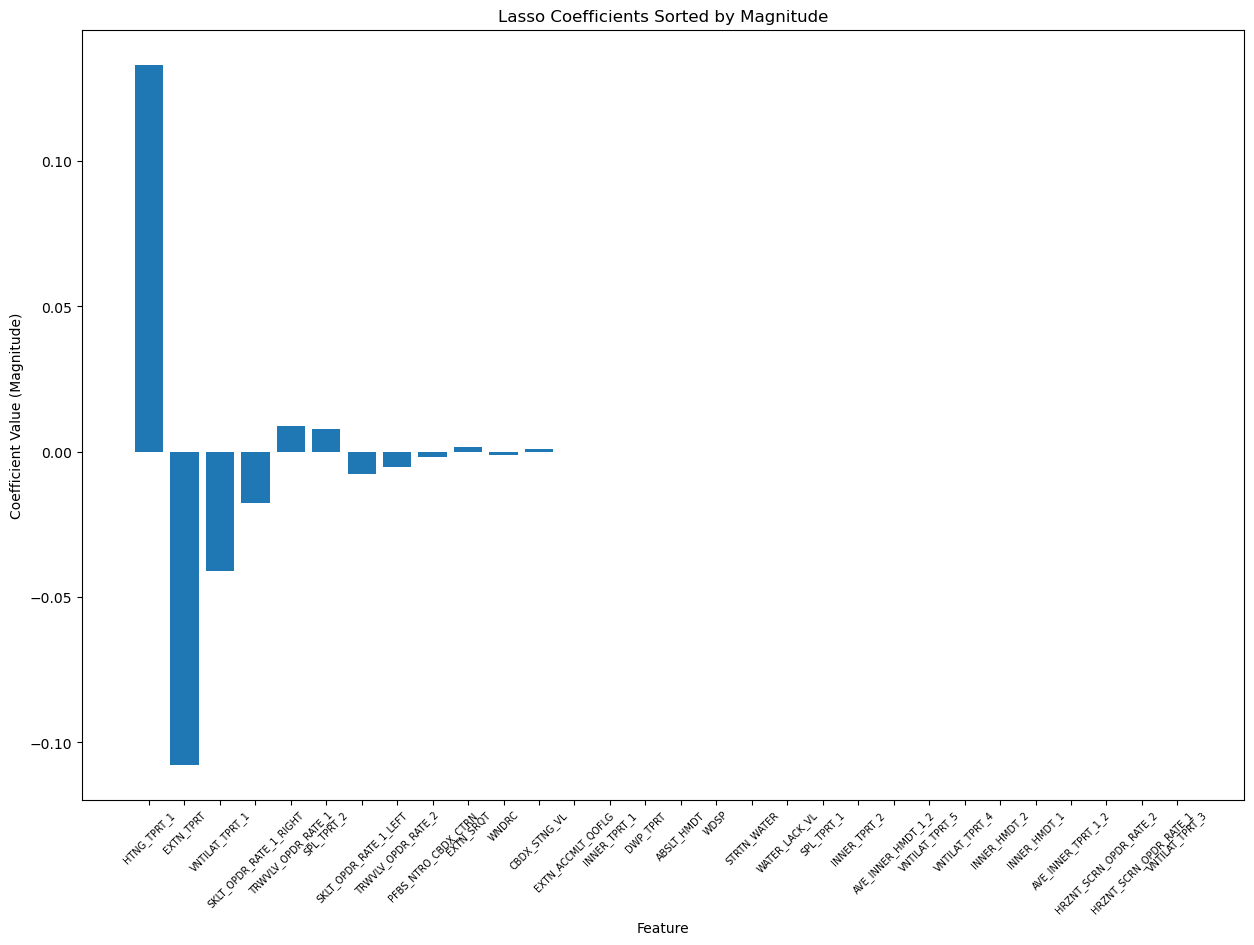

In [15]:
import numpy as np

# Lasso 모델의 계수와 변수명 가져오기
coefficients = lasso_model.coef_
columns = X.columns

# 계수를 크기에 따라 정렬한 인덱스를 얻기
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# 정렬된 계수와 변수명 가져오기
sorted_coefficients = coefficients[sorted_idx]
sorted_columns = columns[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()


In [16]:
# Lasso 모델의 계수와 변수명 가져오기
coefficients = lasso_model.coef_
columns = X.columns

# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = coefficients[i]
    col_name = columns[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: HTNG_TPRT_1, 계수: 0.1332097210696567
변수명: EXTN_TPRT, 계수: -0.10767446162229259
변수명: VNTILAT_TPRT_1, 계수: -0.04095786312686699
변수명: SKLT_OPDR_RATE_1_RIGHT, 계수: -0.01776477320308299
변수명: TRWVLV_OPDR_RATE_1, 계수: 0.008827690954231558
변수명: SPL_TPRT_2, 계수: 0.007789580435436801
변수명: SKLT_OPDR_RATE_1_LEFT, 계수: -0.0075737426252322285
변수명: TRWVLV_OPDR_RATE_2, 계수: -0.005133141127338467
변수명: PFBS_NTRO_CBDX_CTRN, 계수: -0.0018098329638264953
변수명: EXTN_SRQT, 계수: 0.0016386617524346539
변수명: WNDRC, 계수: -0.0012798632688990716
변수명: CBDX_STNG_VL, 계수: 0.0009122735570508696
변수명: EXTN_ACCMLT_QOFLG, 계수: -0.00017689886991244342
변수명: INNER_TPRT_1, 계수: -0.0
변수명: DWP_TPRT, 계수: -0.0
변수명: ABSLT_HMDT, 계수: -0.0
변수명: WDSP, 계수: 0.0
변수명: STRTN_WATER, 계수: -0.0
변수명: WATER_LACK_VL, 계수: -0.0
변수명: SPL_TPRT_1, 계수: 0.0
변수명: INNER_TPRT_2, 계수: -0.0
변수명: AVE_INNER_HMDT_1_2, 계수: 0.0
변수명: VNTILAT_TPRT_5, 계수: 0.0
변수명: VNTILAT_TPRT_4, 계수: -0.0
변수명: INNER_HMDT_2, 계수: 0.0
변수명: INNER_HMDT_1, 계수: -0.0
변수명: AVE_INNER_TPRT_1_2, 계수: -0.0
변수

## 연속형 변수 일부 선택

Mean Squared Error: 2.05638173871464


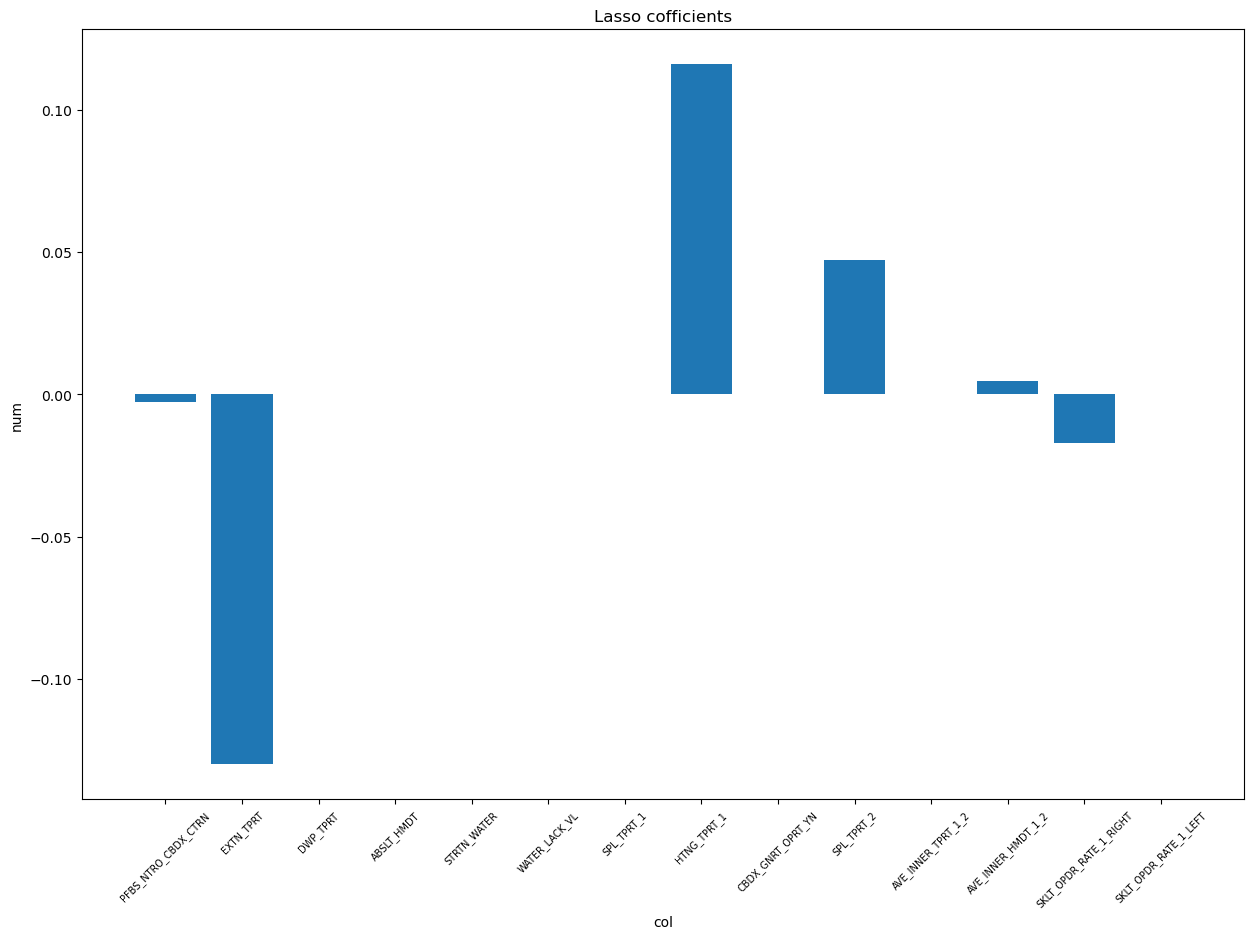

In [17]:
#랏쏘로 피처 선택
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error



df = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")
# Feature와 Target 데이터 분리
X = df[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","ABSLT_HMDT","STRTN_WATER","WATER_LACK_VL","SPL_TPRT_1","HTNG_TPRT_1","CBDX_GNRT_OPRT_YN","SPL_TPRT_2","AVE_INNER_TPRT_1_2","AVE_INNER_HMDT_1_2","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"]]   # 세 번째 열부터 끝까지가 설명 변수
y = df[['FRST_TREE_CNT']]

# Train과 Test 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso 회귀 모델 생성 및 피팅
lasso_model = Lasso(alpha=1.0)  # alpha 값은 L1 정규화 강도를 조절
lasso_model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = lasso_model.predict(X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#plt.figure(figsize=(20, 15))
#plt.plot(np.arange(len(y_test)), y_test, label='real value')
#plt.plot(np.arange(len(y_test)), y_pred, label='predict value')
#plt.title('real vs. predict')
#plt.xlabel('test data index')
#plt.ylabel('num')
#plt.legend()
#plt.grid(True)
#plt.show()

# 모델의 계수 값 확인
# 모델의 계수 값 확인
coefficients = lasso_model.coef_
columns = X.columns

# 결과를 막대 그래프로 시각화
plt.figure(figsize=(15, 10))
plt.bar(columns, coefficients)
plt.title('Lasso cofficients')
plt.xlabel('col')
plt.ylabel('num')
plt.xticks(rotation=45, fontsize = 7)
plt.show()



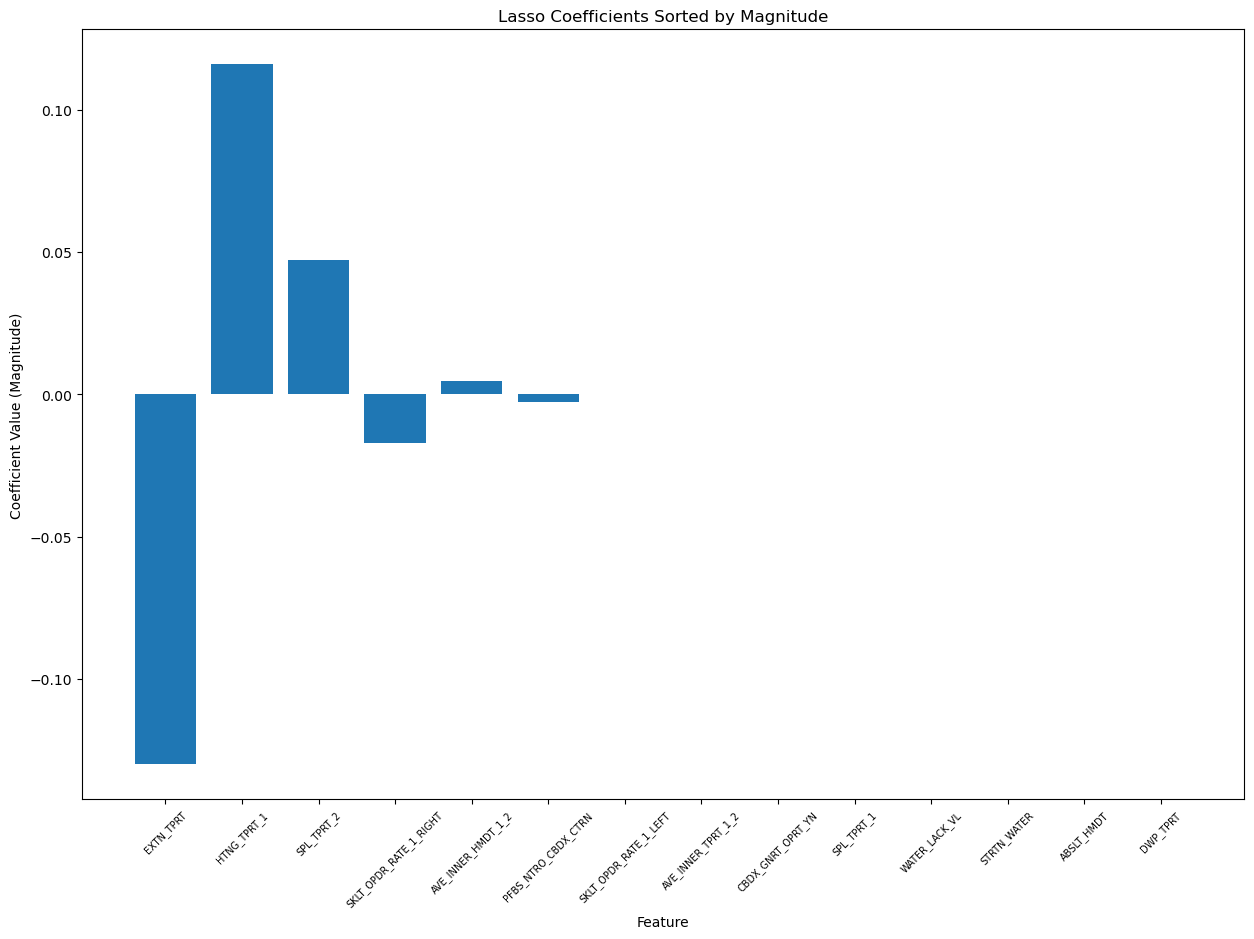

In [18]:
import numpy as np

# Lasso 모델의 계수와 변수명 가져오기
coefficients = lasso_model.coef_
columns = X.columns

# 계수를 크기에 따라 정렬한 인덱스를 얻기
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# 정렬된 계수와 변수명 가져오기
sorted_coefficients = coefficients[sorted_idx]
sorted_columns = columns[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()


In [19]:
# Lasso 모델의 계수와 변수명 가져오기
coefficients = lasso_model.coef_
columns = X.columns

# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = coefficients[i]
    col_name = columns[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: EXTN_TPRT, 계수: -0.130102289724762
변수명: HTNG_TPRT_1, 계수: 0.11595641546163366
변수명: SPL_TPRT_2, 계수: 0.0472973017084171
변수명: SKLT_OPDR_RATE_1_RIGHT, 계수: -0.01703928414221519
변수명: AVE_INNER_HMDT_1_2, 계수: 0.0047008420512791105
변수명: PFBS_NTRO_CBDX_CTRN, 계수: -0.0027622943909213398
변수명: SKLT_OPDR_RATE_1_LEFT, 계수: -0.0
변수명: AVE_INNER_TPRT_1_2, 계수: -0.0
변수명: CBDX_GNRT_OPRT_YN, 계수: 0.0
변수명: SPL_TPRT_1, 계수: 0.0
변수명: WATER_LACK_VL, 계수: -0.0
변수명: STRTN_WATER, 계수: -0.0
변수명: ABSLT_HMDT, 계수: -0.0
변수명: DWP_TPRT, 계수: -0.0
